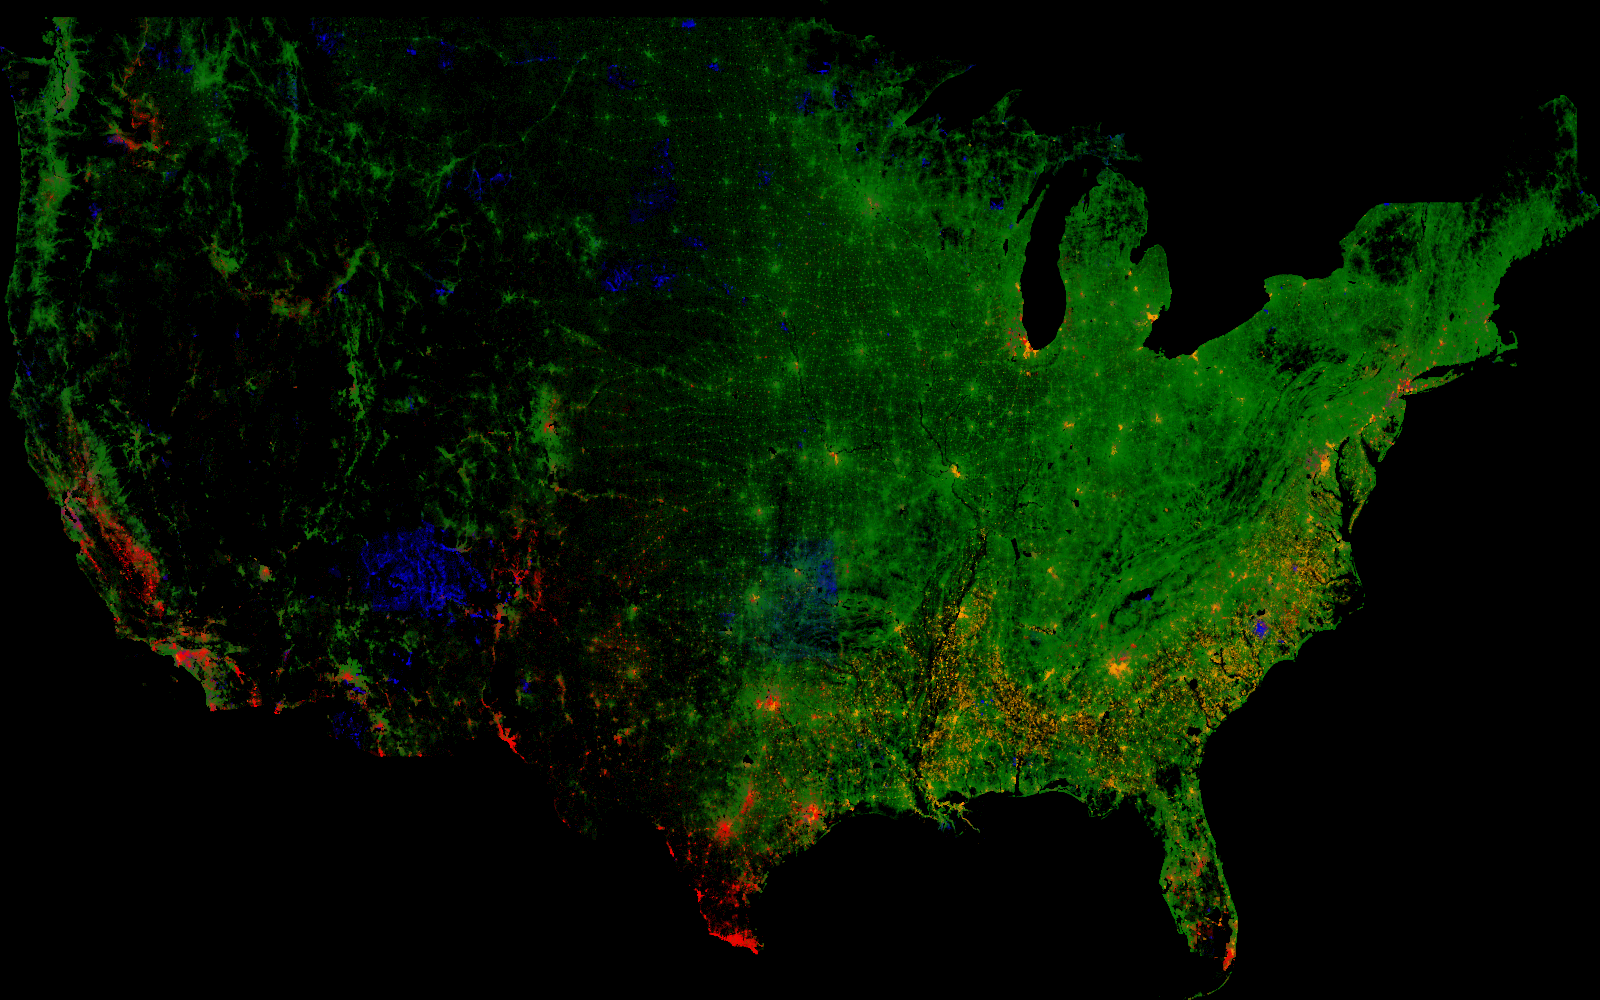

In [1]:
# Python
import dask.dataframe as dd
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire

# Load the data
df = dd.io.parquet.read_parquet('./data/census2010.parq')

# Define the categories and colors
categories = df['race'].unique().compute()
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create a canvas
# canvas = ds.Canvas(plot_width=800, plot_height=800, x_range=(-130, -60), y_range=(20, 55))
easting_min = df['easting'].min().compute()
easting_max = df['easting'].max().compute()
northing_min = df['northing'].min().compute()
northing_max = df['northing'].max().compute()

canvas = ds.Canvas(plot_width=1600, plot_height=1000, 
                   x_range=(easting_min, easting_max), 
                   y_range=(northing_min, northing_max))

# Aggregate the data
agg = canvas.points(df, 'easting', 'northing', ds.count_cat('race'))

# Shade the data
img = tf.shade(agg, color_key=dict(zip(categories, colors)), how='eq_hist')

# Set the background to black
img = tf.set_background(img, 'black')

# Display the image
img


In [2]:
# Python
import dask.dataframe as dd
import holoviews as hv
import hvplot.dask  # adds hvplot method to dask objects
from colorcet import fire

# Load the data
df = dd.io.parquet.read_parquet('./data/census2010.parq')

# Define the categories and colors
categories = df['race'].unique().compute().tolist()
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create an interactive plot with hvplot
points = df.hvplot.points('easting', 'northing', by='race', 
                          cmap=dict(zip(categories, colors)), 
                          datashade=True, dynspread=True, 
                          width=800, height=500)

# Display the plot
hv.extension('bokeh')
points

/Users/dk/workspace/bokeh/venv/lib/python3.11/site-packages/dask/dataframe/groupby.py:1450: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self._meta = self.obj._meta.groupby(


BokehModel(combine_events=True, render_bundle={'docs_json': {'40e3710e-da28-4d6f-b661-b4a7cb57826b': {'version…